# Formation DSA : Introduction à la causalité pour l'actuaire

Auteur Fabien FAIVRE : ffaivre@macif.fr

L'objet de ce classuer est de proposer un premier contact avec l'inférence causale à detination des actuaires

## Mise en place de l'environnement de travail

================== DEBUT du SETUP d'environnement =======================

In [1]:
!python -V

Python 3.11.13


In [2]:
!pip install --force-reinstall numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 378.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


**ATTENTION** : merci de relancer la session en alant dans `Runtime` > `Restart session`

DoWhy 0.12 dépend de la version 3.4 de networkx dont nous allons forcer l'installation. Cela va générer des conflits avec pytorch et cuda, mais dont nous ne nous servirons pas

In [1]:
!pip install --force-reinstall networkx==3.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: networkx
    Found existing installation: networkx 3.5
    Uninstalling networkx-3.5:
      Successfully uninstalled networkx-3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 require

In [3]:
!pip install doubleml==0.10.0
!pip install econml==0.15.1
!pip install causalml==0.15.4
!pip install dowhy==0.12
!pip install tableone==0.9.5
!pip install catboost==1.2.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00


Pour permettre un affichage agréable des graph causaux il est nécessaire d'installer pygraphviz qui pour fonctionner correcteent a besoin sous Linux d'une dépendance `libgraphviz-dev` qu'il faut aller installer à la main

In [4]:
# Pour le bon affichage des modules de visualisation
!apt install libgraphviz-dev
!pip install pygraphviz==1.14

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

================== FIN du SETUP d'environnement =======================

## Définition du cas d'usage

Afin de fixer les idées nous allons nous intéresser à un cas inspiré du marketing

--- Vérification du Calibrage (sur les données complètes) ---
Objectif E[Y(0)]: 75.00%
Réel     E[Y(0)]: 69.63%

Objectif E[Y(1)]: 80.00%
Réel     E[Y(1)]: 76.69%

Objectif ATE:    5.00%
Réel     ATE:    7.06%


Distribution des Segments pour les Données Calibrées:
segment
Sure Thing      52.582
Persuadable     24.104
Sleeping Dog    17.046
Never Taker      6.268
Name: proportion, dtype: float64


<ipython-input-20-11f854716542>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='segment', data=full_df, order=segment_counts.index, palette='plasma')


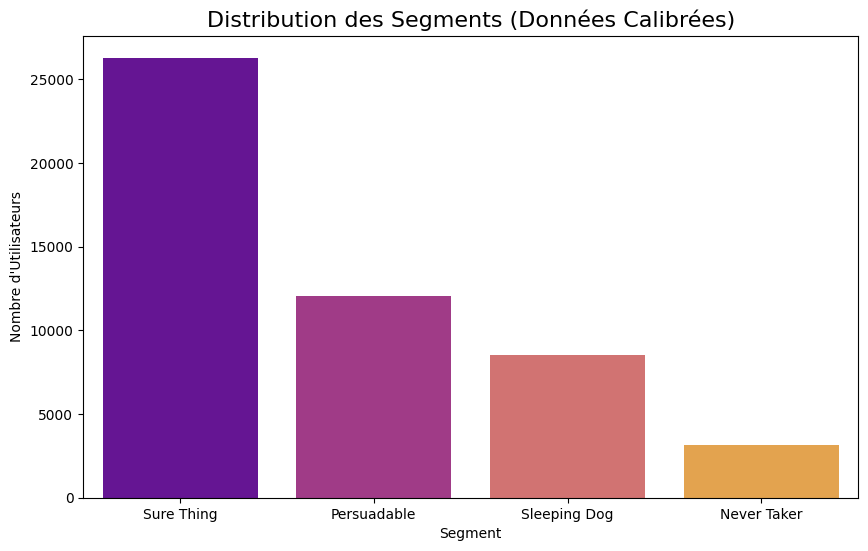

In [20]:
import pandas as pd
import numpy as np

def generate_final_calibrated_data(
    n_samples: int = 50000,
    n_features: int = 12,
    target_y0_mean: float = 0.75,
    target_ate: float = 0.05
) -> (pd.DataFrame, pd.DataFrame):
    """
    Génère un dataset synthétique avec un E[Y0] et un ATE cibles, de manière robuste.
    Inclut les segments, le collider et retourne les dataframes biaisé et non-biaisé.

    Args:
        n_samples (int): Nombre d'échantillons à générer.
        n_features (int): Nombre de features.
        target_y0_mean (float): Le taux de conversion moyen désiré sans traitement.
        target_ate (float): L'effet moyen du traitement désiré.

    Returns:
        tuple[pd.DataFrame, pd.DataFrame]:
            - Le DataFrame complet et non biaisé.
            - Le DataFrame biaisé après sélection par le collider.
    """
    # --- Étape 1: Calculer les paramètres de calibrage ---
    target_y1_mean = target_y0_mean + target_ate
    def logit(p):
        epsilon = 1e-10
        p = np.clip(p, epsilon, 1 - epsilon)
        return np.log(p / (1 - p))

    intercept_y0 = logit(target_y0_mean)
    intercept_y1 = logit(target_y1_mean)

    # --- Étape 2: Générer les données de base ---
    X = pd.DataFrame(np.random.normal(0, 1, size=(n_samples, n_features)),
                       columns=[f'feature_{i+1}' for i in range(n_features)])

    propensity_coeffs = np.random.uniform(-0.5, 0.5, n_features)
    propensity_logit = np.dot(X, propensity_coeffs)
    sigmoid = lambda x: 1 / (1 + np.exp(-x))
    propensity_prob = sigmoid(propensity_logit)
    treatment = np.random.binomial(1, propensity_prob)

    # --- Étape 3: Générer les probabilités (CORRIGÉ) ---
    # On utilise des coefficients distincts pour Y0 et Y1 pour éviter les interférences
    outcome_coeffs_y0 = np.random.uniform(-0.5, 0.5, n_features)
    outcome_coeffs_y1 = np.random.uniform(-0.5, 0.5, n_features)

    # Logit pour Y(0), centré par notre intercept_y0
    logit_y0 = np.dot(X, outcome_coeffs_y0) + intercept_y0
    p_outcome_untreated = sigmoid(logit_y0)

    # Logit pour Y(1), centré par notre intercept_y1
    logit_y1 = np.dot(X, outcome_coeffs_y1) + intercept_y1
    p_outcome_treated = sigmoid(logit_y1)

    # --- Étape 4: Réaliser les résultats ---
    Y0 = np.random.binomial(1, p_outcome_untreated)
    Y1 = np.random.binomial(1, p_outcome_treated)
    observed_outcome = treatment * Y1 + (1 - treatment) * Y0

    # --- Étape 5: Assembler le DataFrame complet ---
    full_unbiased_df = X.copy()
    full_unbiased_df['treatment'] = treatment
    full_unbiased_df['Y0'] = Y0
    full_unbiased_df['Y1'] = Y1
    full_unbiased_df['outcome'] = observed_outcome
    full_unbiased_df['ite_prob'] = p_outcome_treated - p_outcome_untreated

    conditions = [
        (full_unbiased_df['Y0'] == 0) & (full_unbiased_df['Y1'] == 1),
        (full_unbiased_df['Y0'] == 1) & (full_unbiased_df['Y1'] == 1),
        (full_unbiased_df['Y0'] == 1) & (full_unbiased_df['Y1'] == 0),
        (full_unbiased_df['Y0'] == 0) & (full_unbiased_df['Y1'] == 0)
    ]
    choices = ['Persuadable', 'Sure Thing', 'Sleeping Dog', 'Never Taker']
    full_unbiased_df['segment'] = np.select(conditions, choices, default='Error')

    # --- Étape 6: Ajouter le Collider ---
    collider_logit = 1.2 * full_unbiased_df['treatment'] + 1.5 * full_unbiased_df['outcome'] - 1.0
    prob_selection = sigmoid(collider_logit)
    selection = np.random.binomial(1, prob_selection)
    full_unbiased_df['selection_collider'] = selection

    # --- Étape 7: Créer le jeu de données biaisé ---
    biased_df = full_unbiased_df[full_unbiased_df['selection_collider'] == 1].copy()

    return full_unbiased_df, biased_df

# --- Générer les données et vérifier ---
TARGET_Y0_MEAN = 0.75
TARGET_ATE = 0.05

full_df, biased_df = generate_final_calibrated_data(
    target_y0_mean=TARGET_Y0_MEAN,
    target_ate=TARGET_ATE
)

# --- Vérification du Calibrage sur la POPULATION TOTALE ---
print("--- Vérification du Calibrage (sur les données complètes) ---")
actual_y0_mean = full_df['Y0'].mean()
actual_y1_mean = full_df['Y1'].mean()
actual_ate = actual_y1_mean - actual_y0_mean

print(f"Objectif E[Y(0)]: {TARGET_Y0_MEAN:.2%}")
print(f"Réel     E[Y(0)]: {actual_y0_mean:.2%}\n")

print(f"Objectif E[Y(1)]: {TARGET_Y0_MEAN + TARGET_ATE:.2%}")
print(f"Réel     E[Y(1)]: {actual_y1_mean:.2%}\n")

print(f"Objectif ATE:    {TARGET_ATE:.2%}")
print(f"Réel     ATE:    {actual_ate:.2%}\n")

# Afficher la distribution des segments pour ce nouveau scénario
print("\nDistribution des Segments pour les Données Calibrées:")
segment_counts = full_df['segment'].value_counts(normalize=True) * 100
print(segment_counts)

# Visualiser la distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='segment', data=full_df, order=segment_counts.index, palette='plasma')
plt.title('Distribution des Segments (Données Calibrées)', fontsize=16)
plt.ylabel('Nombre d\'Utilisateurs')
plt.xlabel('Segment')
plt.show()

In [29]:
full_df

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       1.020003  -1.085647   1.252751   1.492513   1.295669  -0.146288   
1       0.171507   0.860206   1.389396  -2.171336   0.407673   0.566109   
2       0.020553   0.683664  -0.142949   0.651932   1.031460   0.785116   
3       0.441661   0.113539  -1.183310   1.869493  -1.571153   1.443348   
4      -0.375112  -0.366178  -1.092826   0.466952  -0.562258   2.208661   
...          ...        ...        ...        ...        ...        ...   
49995   0.033541  -1.827763   0.599916   0.526809  -0.315948  -0.411938   
49996  -1.804710   0.391241  -0.810330   0.129792   0.547401  -1.602760   
49997   0.566178  -2.227168   1.778147  -0.374164   0.652318   1.137575   
49998   0.373136   0.472811   0.632405   1.463656   1.466000   0.333244   
49999  -0.053210  -0.585973   0.673743   1.136745   0.090219   0.133854   

       feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0      -0.106084  -1.857188  -1.303645   -1.217982    2.222917    1.553337   
1      -1.220901   0.274051  -0.441126    0.016279   -1.749869    1.611843   
2       0.375169   0.111109   1.639418    0.924066   -0.631359   -2.095132   
3       0.411133   1.270447  -0.049342    0.444233   -0.868300   -0.071359   
4      -1.100441   0.170663   0.481724    0.355912   -1.117091   -0.093695   
...          ...        ...        ...         ...         ...         ...   
49995   2.372621  -0.805135   0.962752    0.281991   -0.734004    1.352813   
49996   0.334684   0.929168  -0.649065    0.270427    0.631650    0.435950   
49997   0.752986  -1.056615  -1.398309   -0.872871   -0.883911    0.818681   
49998   1.103054   0.346645   0.324778   -0.431362   -0.303729    0.224332   
49999   0.832658   0.359400  -0.408237    0.459350   -1.431872    1.153145   

       treatment  Y0  Y1  outcome  ite_prob       segment  selection_collider  
0              1   1   0        0 -0.492024  Sleeping Dog                   0  
1              1   1   0        0 -0.227018  Sleeping Dog                   0  
2              1   1   1        1  0.398336    Sure Thing                   1  
3              1   0   1        1  0.308878   Persuadable                   1  
4              0   1   0        1  0.376947  Sleeping Dog                   1  
...          ...  ..  ..      ...       ...           ...                 ...  
49995          1   1   1        1 -0.131561    Sure Thing                   1  
49996          0   0   1        0  0.324235   Persuadable                   1  
49997          1   0   0        0 -0.375014   Never Taker                   1  
49998          1   1   1        1 -0.042315    Sure Thing                   1  
49999          1   0   0        0 -0.079931   Never Taker                   1  

[50000 rows x 19 columns]

**Question** : Pourquoi souhaite-t-on travailler avec un jeu de données simulées ?

In [ ]:
# Remplacez cette URL par la vôtre, obtenue à l'étape 1
url_raw = 'https://raw.githubusercontent.com/Fabien-DS/DSA_Causal/main/full_df.parquet'

# Lire le fichier Parquet directement depuis l'URL
try:
    df = pd.read_parquet(url_raw)
    print("Fichier Parquet lu avec succès !")
    print(df.head())
except Exception as e:
    print(f"Une erreur est survenue : {e}")
    print("Vérifiez que votre URL est bien une URL 'raw' et que le dépôt est public.")

## Les 4 étapes du processus Causal

La Causalité suit un [processus en 4 étapes](https://www.pywhy.org/dowhy/v0.10.1/user_guide/causal_tasks/estimating_causal_effects/index.html) tel que matérialisé dans le package [DoWhy](https://www.pywhy.org/dowhy/v0.12/)

![dowhy-schematic](https://raw.githubusercontent.com/microsoft/dowhy/main/docs/images/dowhy-schematic.png)



## Etape 1 : réfléchir au problème => définition du graph causal

(Optionnel) : avant même d'avoir des données!

Il est possible de commencer à poser ses hypothèses sur un projet avant même de collecter des données. Loin d'être annecdotique, cette étape permet d'expliciter des hypothèses qui sans cela resteraient implicites. Cette étape est particulièrement adaptée pour échanger avec des experts métiers, qui détiennent une expertise du domaine. En explicitant les hypothèses sur les procéssus à l'origine des données, il est possible de générer des discussions fructueuses.

![DAG](https://github.com/Fabien-DS/DSA_Causal/blob/main/images/CausalDAG.png?raw=true)

A titre d'exemple, après une série d'interview de découverte avec des experts métier vous avez déterminé :

- que vous souhaitez connaitre l'impact de la variable `treatment` (ex : un appel téléphonique) sur la variable `outcome` (le maintien en portefeuille).

- que plusieurs variables confondantes existent (càd étant des ancêtres communs de `treatment`et `outcome`) existent appelées (`feature_1` à `feature_12`)

- Enfin qu'une variable `selection_collider` est un collider (càd un descendant de  `treatment` et `outcome`)

In [30]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import doubleml as dml

from dowhy import CausalModel

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

On commence par nommer les variables qui nous intéressent :

In [41]:
columns=['outcome', 'treatment'] + [f"feature_{k}" for k in range(1,13)] + ['selection_collider']
columns

['outcome',
 'treatment',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'selection_collider']

Puis on peut renseigner les liens entre ces variables.

In [42]:
causal_graph = """
digraph {
feature_1 -> outcome;
feature_2 -> outcome;
feature_3 -> outcome;
feature_4 -> outcome;
feature_5 -> outcome;
feature_6 -> outcome;
feature_7 -> outcome;
feature_8 -> outcome;
feature_9 -> outcome;
feature_10 -> outcome;
feature_11 -> outcome;
feature_12 -> outcome;
feature_1 -> treatment;
feature_2 -> treatment;
feature_3 -> treatment;
feature_4 -> treatment;
feature_5 -> treatment;
feature_6 -> treatment;
feature_7 -> treatment;
feature_8 -> treatment;
feature_9 -> treatment;
feature_10 -> treatment;
feature_11 -> treatment;
feature_12 -> treatment;
treatment -> outcome;
treatment -> selection_collider;
outcome -> selection_collider;
}
"""

L'astuce consiste à créer un Pandas DataFrame vide avec le nom des variables que nous avons choisi de modéliser

In [43]:
df_model = pd.DataFrame(columns=columns)
df_model

Empty DataFrame
Columns: [outcome, treatment, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9, feature_10, feature_11, feature_12, selection_collider]
Index: []

Il devient alors possible de tirer parti de la puissance de DoWhy en initialisant un objet de classe [CausalModel](https://www.pywhy.org/dowhy/v0.12/dowhy.html#module-dowhy.causal_model)

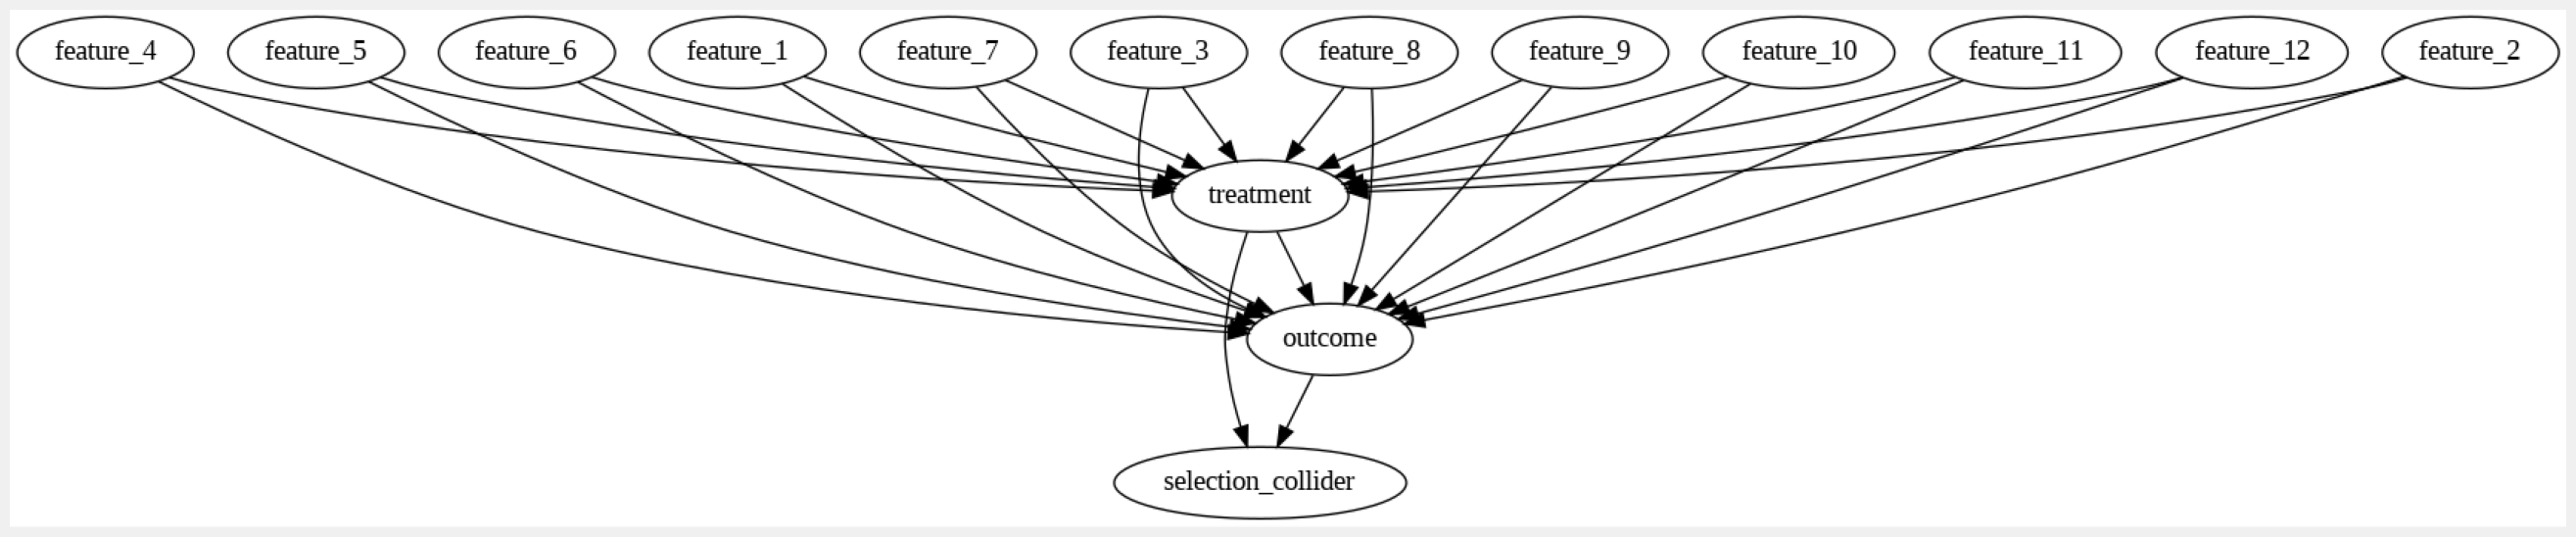

In [44]:
model= CausalModel(
          data=df_model, # Données
          graph=causal_graph, # DAG
          treatment='treatment', # Traitement
          outcome='outcome' # Variable d'intérêt
        )

#Affichage du Graph Causal
model.view_model(size=(30,30))

DoWhy propose une mise en forme par défaut mais celle-ci dépend du module pygraphviz. Il n'est pas possible d'en changer manuellement l'agencement.
Une autre option dans ce cas consiste à utiliser l'application Web DAGitty

### (optionnel) Etape 1 bis : DAGitty

DAGitty est une application web pour créer, éditer et analyser des diagrams causaux.
Pour pouvoir réutiliser le graph que nosu avons défini à l'étape suivante il nous faut éditer légèrement de format du DAG :

In [45]:
causal_graph_daggity = (
    causal_graph
    .replace('digraph {\n', 'dag {\n"')
    .replace("; ", '"\n"')
    .replace(";", '"\n"')
    .replace('"\n"\n', '"\n"')
    .replace(' -> ', '" -> "')
    .replace('"}', '}')
)
print(causal_graph_daggity)


dag {
"feature_1" -> "outcome"
"feature_2" -> "outcome"
"feature_3" -> "outcome"
"feature_4" -> "outcome"
"feature_5" -> "outcome"
"feature_6" -> "outcome"
"feature_7" -> "outcome"
"feature_8" -> "outcome"
"feature_9" -> "outcome"
"feature_10" -> "outcome"
"feature_11" -> "outcome"
"feature_12" -> "outcome"
"feature_1" -> "treatment"
"feature_2" -> "treatment"
"feature_3" -> "treatment"
"feature_4" -> "treatment"
"feature_5" -> "treatment"
"feature_6" -> "treatment"
"feature_7" -> "treatment"
"feature_8" -> "treatment"
"feature_9" -> "treatment"
"feature_10" -> "treatment"
"feature_11" -> "treatment"
"feature_12" -> "treatment"
"treatment" -> "outcome"
"treatment" -> "selection_collider"
"outcome" -> "selection_collider"
}



Le DAG ci-dessus est à coller dans [DAGGIty](https://www.dagitty.net/dags.html) dans le paneau de droite à la section Model Code, puis cliquez sur "Update DAG";
- Sélectionnez le noeud "conversion" et attribuez-lui le statut "Outcome" (paneau en haut à gauche)
- Sélectionnez le noeud "coupon" et attribuez-lui le statut "Exposure" (paneau en haut à gauche)

Quelles sont les implications testables de ce modèle ?

+

+

+

+

...

Il est possible de modifier la disposition du graph à la main pour en faciliter la lecture, voici un exemple de disposition (récupéré en copiant le code du DAG après avoir déplacé les noeuds):

In [ ]:
"""
dag {
bb="-3.99,-3.968,3.904,3.978"
feature_1 [pos="-2.429,-2.907"]
feature_10 [pos="1.696,-2.880"]
feature_11 [pos="2.254,-2.854"]
feature_12 [pos="2.912,-2.775"]
feature_2 [pos="-2.067,-2.907"]
feature_3 [pos="-1.598,-2.863"]
feature_4 [pos="-1.242,-2.898"]
feature_5 [pos="-0.790,-2.907"]
feature_6 [pos="-0.333,-2.907"]
feature_7 [pos="0.135,-2.863"]
feature_8 [pos="0.632,-2.872"]
feature_9 [pos="1.139,-2.880"]
outcome [outcome,pos="0.626,0.189"]
selection_collider [pos="0.029,1.522"]
treatment [exposure,pos="-0.539,0.198"]
feature_1 -> outcome
feature_1 -> treatment
feature_10 -> outcome
feature_10 -> treatment
feature_11 -> outcome
feature_11 -> treatment
feature_12 -> outcome
feature_12 -> treatment
feature_2 -> outcome
feature_2 -> treatment
feature_3 -> outcome
feature_3 -> treatment
feature_4 -> outcome
feature_4 -> treatment
feature_5 -> outcome
feature_5 -> treatment
feature_6 -> outcome
feature_6 -> treatment
feature_7 -> outcome
feature_7 -> treatment
feature_8 -> outcome
feature_8 -> treatment
feature_9 -> outcome
feature_9 -> treatment
outcome -> selection_collider
treatment -> outcome
treatment -> selection_collider
}

"""

'\ndag {\nbb="-5.436,-5.455,4.834,4.734"\nX0 [pos="2.404,-0.279"]\nX1 [pos="2.760,-0.279"]\nX10 [pos="-1.266,-3.994"]\nX11 [pos="-0.910,-3.983"]\nX12 [pos="-0.555,-3.983"]\nX13 [pos="-0.185,-3.983"]\nX14 [pos="0.170,-3.959"]\nX2 [pos="3.166,-0.302"]\nX3 [pos="3.543,-0.279"]\nX4 [pos="3.978,-0.302"]\nX5 [pos="-3.130,-3.924"]\nX6 [pos="-2.745,-3.936"]\nX7 [pos="-2.368,-3.936"]\nX8 [pos="-2.005,-3.959"]\nX9 [pos="-1.636,-3.983"]\nZ [pos="0.446,2.806"]\nconversion [outcome,pos="1.577,1.135"]\ncoupon [exposure,pos="-0.743,1.135"]\nmembership_level_0 [pos="0.403,-1.213"]\nmembership_level_1 [pos="0.417,-0.629"]\nmembership_level_2 [pos="0.439,0.025"]\nX0 -> conversion\nX1 -> conversion\nX10 -> conversion\nX10 -> coupon\nX11 -> conversion\nX11 -> coupon\nX12 -> conversion\nX12 -> coupon\nX13 -> conversion\nX13 -> coupon\nX14 -> conversion\nX14 -> coupon\nX2 -> conversion\nX3 -> conversion\nX4 -> conversion\nX5 -> conversion\nX5 -> coupon\nX6 -> conversion\nX6 -> coupon\nX7 -> conversion\nX7 -

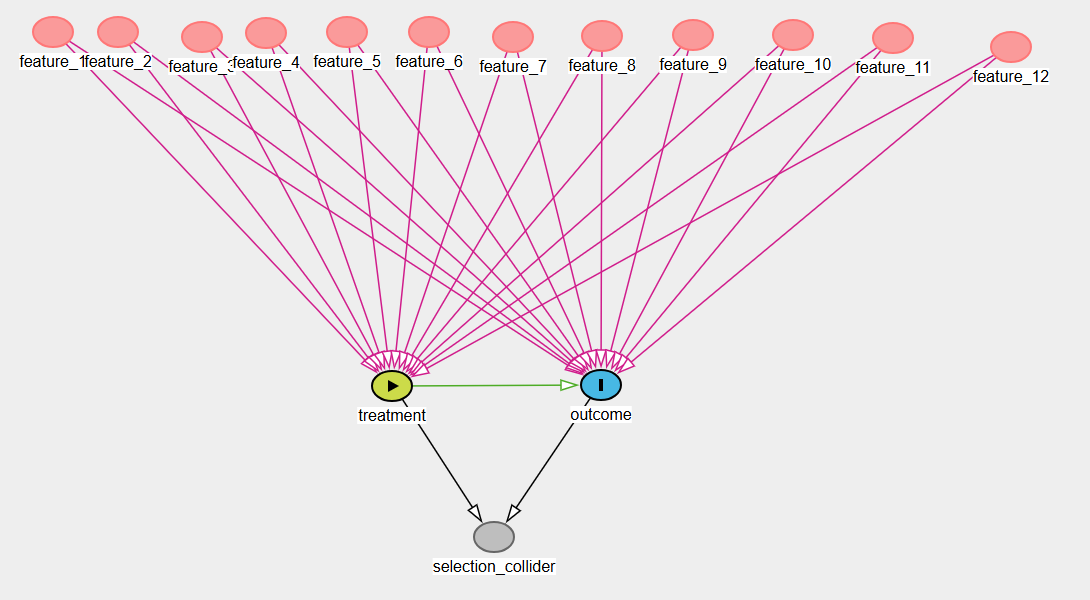

## Etape 2 : l'effet du coupon sur la conversion est-il identifiable ?

Nous sommes intéressés par l'effet de l'attribution d'une réduction (`coupon`) sur la `conversion` dans la population générale.
D'un point de vue causal cette quantité s'écrit :

$$ ATE = E\left[ conversion | do( coupon=1)\right] - E\left[ conversion | do( coupon=0)\right]$$

Cette quantité n'est pas directement observable. La question est de s'avoir s'il existe *"recette"* qui permette de se ramener à des valeurs observables (càd des probabilités conditionnelles).

DoWhy permet de mener cette étape pour nous

In [46]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[outcome|feature_3,feature_8,feature_11,feature_5,feature_6,feat ↪
d[treatment]                                                                   ↪

↪                                                                      
↪ ure_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2])
↪                                                                      
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→outcome then P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2,U) = P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

Quelles variables ont été omises dans l'estimateur ? Pourquoi ?

1.   List item
2.   List item



NB : cette approche permet de travailler sur les données qu'il serait intéressant de collecter pour l'identification de l'effet.

## Etape 3 : Estimation de l'effet causal

Maintenant que DoWhy nous a fourni u estimateur, nous pouvons mobiliser des méthodes d'estimation statistiques (statistqiue, ML, DL...) pour estier l'effet.

Le fait d'avoir pu déterminer un bon estimateur causal, **ne dédoine pas des considérations statistiques** à cette étape :
- classes déséquilibrées
- bonne calibration de l'estimateur (prédictiosn conformes)
- optimisation des hyper paramètres

 Un élément **CRUCIAL** à valider à cette étape est l'hypothèse de **positivité**

Pour avoir une ase de comparaison, nous allons partir d'une régression logistique

### Etape 3.0 : récupération du jeu de données et réinitialisation du modèle causal

In [47]:
full_df.shape

(50000, 19)

In [48]:
full_df

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       1.020003  -1.085647   1.252751   1.492513   1.295669  -0.146288   
1       0.171507   0.860206   1.389396  -2.171336   0.407673   0.566109   
2       0.020553   0.683664  -0.142949   0.651932   1.031460   0.785116   
3       0.441661   0.113539  -1.183310   1.869493  -1.571153   1.443348   
4      -0.375112  -0.366178  -1.092826   0.466952  -0.562258   2.208661   
...          ...        ...        ...        ...        ...        ...   
49995   0.033541  -1.827763   0.599916   0.526809  -0.315948  -0.411938   
49996  -1.804710   0.391241  -0.810330   0.129792   0.547401  -1.602760   
49997   0.566178  -2.227168   1.778147  -0.374164   0.652318   1.137575   
49998   0.373136   0.472811   0.632405   1.463656   1.466000   0.333244   
49999  -0.053210  -0.585973   0.673743   1.136745   0.090219   0.133854   

       feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0      -0.106084  -1.857188  -1.303645   -1.217982    2.222917    1.553337   
1      -1.220901   0.274051  -0.441126    0.016279   -1.749869    1.611843   
2       0.375169   0.111109   1.639418    0.924066   -0.631359   -2.095132   
3       0.411133   1.270447  -0.049342    0.444233   -0.868300   -0.071359   
4      -1.100441   0.170663   0.481724    0.355912   -1.117091   -0.093695   
...          ...        ...        ...         ...         ...         ...   
49995   2.372621  -0.805135   0.962752    0.281991   -0.734004    1.352813   
49996   0.334684   0.929168  -0.649065    0.270427    0.631650    0.435950   
49997   0.752986  -1.056615  -1.398309   -0.872871   -0.883911    0.818681   
49998   1.103054   0.346645   0.324778   -0.431362   -0.303729    0.224332   
49999   0.832658   0.359400  -0.408237    0.459350   -1.431872    1.153145   

       treatment  Y0  Y1  outcome  ite_prob       segment  selection_collider  
0              1   1   0        0 -0.492024  Sleeping Dog                   0  
1              1   1   0        0 -0.227018  Sleeping Dog                   0  
2              1   1   1        1  0.398336    Sure Thing                   1  
3              1   0   1        1  0.308878   Persuadable                   1  
4              0   1   0        1  0.376947  Sleeping Dog                   1  
...          ...  ..  ..      ...       ...           ...                 ...  
49995          1   1   1        1 -0.131561    Sure Thing                   1  
49996          0   0   1        0  0.324235   Persuadable                   1  
49997          1   0   0        0 -0.375014   Never Taker                   1  
49998          1   1   1        1 -0.042315    Sure Thing                   1  
49999          1   0   0        0 -0.079931   Never Taker                   1  

[50000 rows x 19 columns]

On se donne un jeu de test qui nous servira de base de comparaison

In [83]:
df_train, df_test = train_test_split(full_df, test_size=0.3, random_state=42)

In [84]:
df_train.dtypes

feature_1             float64
feature_2             float64
feature_3             float64
feature_4             float64
feature_5             float64
feature_6             float64
feature_7             float64
feature_8             float64
feature_9             float64
feature_10            float64
feature_11            float64
feature_12            float64
treatment               int64
Y0                      int64
Y1                      int64
outcome                 int64
ite_prob              float64
segment                object
selection_collider      int64
dtype: object

Il s'agit d'un jeu de donnée simulé, ce qui nous permet (contrairement à un cas réel) de connaitre la valeur réelle de l'effet du traitemant sur chaque unité traitée ("Individual Treatment Effect" ou ite dans le jeu de données

Il est donc possible de calculer l'effet moyen du traitement sur la pouplation sotate ("Average Treatment Effect" ou ATE) :

In [85]:
# True average treatment effect
ATE_test = df_test['ite_prob'].mean()
print(ATE_test)

0.06724302069959309


In [86]:
df_test['Y1'].mean()-df_test['Y0'].mean()

0.07033333333333336

In [87]:
df_train['ite_prob'].describe()

count    35000.000000
mean         0.069456
std          0.288000
min         -0.866654
25%         -0.126213
50%          0.047140
75%          0.257610
max          0.954248
Name: ite_prob, dtype: float64

In [88]:
import plotly.express as px
fig = px.ecdf(df_train, x="ite_prob")
fig.show()

In [89]:
fig = px.ecdf(df_train, x="ite_prob", color="treatment")
fig.show()

Un outil pratique pour comparer deux échantillons de données est [TableOne](https://github.com/tompollard/tableone)

In [90]:
from tableone import TableOne

table1 = TableOne(df_train, show_histograms=True)
table1

Missing       Overall Histogram
n                                                      35000          
feature_1, mean (SD)                         0     0.0 (1.0)  ▂▃▆█▇▆▃▂
feature_2, mean (SD)                         0    -0.0 (1.0)  ▂▃▆█▇▅▃▂
feature_3, mean (SD)                         0    -0.0 (1.0)  ▂▃▅▇█▅▃▂
feature_4, mean (SD)                         0    -0.0 (1.0)  ▂▃▅▇█▅▃▂
feature_5, mean (SD)                         0     0.0 (1.0)  ▂▃▅█▇▅▃▂
feature_6, mean (SD)                         0     0.0 (1.0)  ▂▃▅█▇▆▃▂
feature_7, mean (SD)                         0     0.0 (1.0)  ▂▃▆▇█▅▃▂
feature_8, mean (SD)                         0     0.0 (1.0)  ▂▃▆█▇▆▃▂
feature_9, mean (SD)                         0     0.0 (1.0)  ▂▃▅▇█▆▃▂
feature_10, mean (SD)                        0     0.0 (1.0)  ▂▃▅█▇▅▃▂
feature_11, mean (SD)                        0     0.0 (1.0)  ▂▃▆█▇▆▃▂
feature_12, mean (SD)                        0     0.0 (1.0)  ▂▃▆█▇▅▃▂
treatment, n (%)          0                     17526 (50.1)          
                          1                     17474 (49.9)          
Y0, n (%)                 0                     10638 (30.4)          
                          1                     24362 (69.6)          
Y1, n (%)                 0                      8164 (23.3)          
                          1                     26836 (76.7)          
outcome, n (%)            0                     10792 (30.8)          
                          1                     24208 (69.2)          
ite_prob, mean (SD)                          0     0.1 (0.3)  ▂▃▆█▆▄▃▂
segment, n (%)            Never Taker             2166 (6.2)          
                          Persuadable            8472 (24.2)          
                          Sleeping Dog           5998 (17.1)          
                          Sure Thing            18364 (52.5)          
selection_collider, n (%) 0                     12848 (36.7)          
                          1                     22152 (63.3)

In [91]:
table2 = TableOne(df_train,groupby="treatment", smd=True, show_histograms=True)
table2

Grouped by treatment                                                                                              
                                                    Missing       Overall             0             1 SMD (0,1) 0 Histogram 1 Histogram Overall Histogram
n                                                                   35000         17526         17474                                                    
feature_1, mean (SD)                                      0     0.0 (1.0)    -0.1 (1.0)     0.1 (1.0)     0.276    ▂▃▅█▇▅▃▂    ▂▃▆█▇▅▃▂          ▂▃▆█▇▆▃▂
feature_2, mean (SD)                                      0    -0.0 (1.0)    -0.1 (1.0)     0.1 (1.0)     0.225    ▂▃▅▇█▆▃▂    ▂▃▆█▇▅▃▂          ▂▃▆█▇▅▃▂
feature_3, mean (SD)                                      0    -0.0 (1.0)    -0.2 (1.0)     0.2 (1.0)     0.351    ▂▃▅▇█▅▃▂    ▂▃▅▇█▅▃▂          ▂▃▅▇█▅▃▂
feature_4, mean (SD)                                      0    -0.0 (1.0)    -0.1 (1.0)     0.1 (1.0)     0.283    ▂▃▆█▇▅▃▂    ▂▃▅█▇▅▃▂          ▂▃▅▇█▅▃▂
feature_5, mean (SD)                                      0     0.0 (1.0)    -0.2 (1.0)     0.2 (1.0)     0.353    ▂▃▅█▇▅▃▂    ▂▃▅█▇▅▃▂          ▂▃▅█▇▅▃▂
feature_6, mean (SD)                                      0     0.0 (1.0)     0.0 (1.0)    -0.0 (1.0)    -0.022    ▂▃▅█▇▆▃▂    ▂▃▅▇█▅▃▂          ▂▃▅█▇▆▃▂
feature_7, mean (SD)                                      0     0.0 (1.0)    -0.1 (1.0)     0.1 (1.0)     0.149    ▂▃▅█▇▅▃▂    ▂▃▅▇█▅▃▂          ▂▃▆▇█▅▃▂
feature_8, mean (SD)                                      0     0.0 (1.0)     0.2 (1.0)    -0.2 (1.0)    -0.335    ▂▃▆▇█▅▃▂    ▂▃▆█▇▆▃▂          ▂▃▆█▇▆▃▂
feature_9, mean (SD)                                      0     0.0 (1.0)     0.1 (1.0)    -0.1 (1.0)    -0.237    ▂▃▅█▇▅▃▂    ▂▃▅▇█▆▃▂          ▂▃▅▇█▆▃▂
feature_10, mean (SD)                                     0     0.0 (1.0)    -0.2 (1.0)     0.2 (1.0)     0.376    ▂▃▅█▇▅▃▂    ▂▃▅█▇▅▃▂          ▂▃▅█▇▅▃▂
feature_11, mean (SD)                                     0     0.0 (1.0)    -0.1 (1.0)     0.1 (1.0)     0.249    ▂▃▆▇█▅▃▂    ▂▃▆▇█▆▃▂          ▂▃▆█▇▆▃▂
feature_12, mean (SD)                                     0     0.0 (1.0)    -0.0 (1.0)     0.0 (1.0)     0.047    ▂▃▅█▇▅▃▂    ▂▃▆▇█▆▃▂          ▂▃▆█▇▅▃▂
Y0, n (%)                 0                                  10638 (30.4)   6459 (36.9)   4179 (23.9)     0.284                                          
                          1                                  24362 (69.6)  11067 (63.1)  13295 (76.1)                                                    
Y1, n (%)                 0                                   8164 (23.3)   3831 (21.9)   4333 (24.8)     0.070                                          
                          1                                  26836 (76.7)  13695 (78.1)  13141 (75.2)                                                    
outcome, n (%)            0                                  10792 (30.8)   6459 (36.9)   4333 (24.8)     0.263                                          
                          1                                  24208 (69.2)  11067 (63.1)  13141 (75.2)                                                    
ite_prob, mean (SD)                                       0     0.1 (0.3)     0.1 (0.3)    -0.0 (0.3)    -0.557    ▂▃▆█▇▅▃▂    ▂▃▆█▆▄▂▂          ▂▃▆█▆▄▃▂
segment, n (%)            Never Taker                          2166 (6.2)    1253 (7.1)     913 (5.2)     0.290                                          
                          Persuadable                         8472 (24.2)   5206 (29.7)   3266 (18.7)                                                    
                          Sleeping Dog                        5998 (17.1)   2578 (14.7)   3420 (19.6)                                                    
                          Sure Thing                         18364 (52.5)   8489 (48.4)   9875 (56.5)                                                    
selection_collider, n (%) 0        

In [92]:
df_train.query('treatment==1')['outcome'].mean() - df_train.query('treatment==0')['outcome'].mean()

0.1205697616494984

In [93]:
df_train['ite_prob'].mean()

0.06945584741542764

### Etape 3.1 : Test de l'hypothèse de positivité

Pour pouvoir construire des contrefactuels crédibles (càd des estimations de situations qui ne se sont pas réalisées il faut disposer de données comparables selon les différents états possibles. Dans le cas d'un traitement binaire celà revient à dire :
$$0<P(T|X=x)<1$$

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

**ATTENTION** pour éviter de l'overfit, nous allons utiliser ici une méthode appelée **cross-fitting**. Elle consiste à séparer le jeu de données en K partitions, ajuster le modèle sur K-1 partition et utiliser ses prédictions ("out of fold") sur la partition restante.
Pour des raisons de simplicité, nous allons ici utiliser 2 partitions uniquement

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import random

random.seed(1234)

def train_model(X, y):
    parameters = {
        "learning_rate": [0.01, 0.15, 0.2],
        "max_depth": [1, 2, 3],
        "n_estimators": [100, 200, 300],
    }

    grid_cv = GridSearchCV(
        CatBoostClassifier(verbose=False), parameters, scoring="roc_auc", cv=5, n_jobs=-1
    )
    grid_cv.fit(X, y)
    return grid_cv

**Question** : quand on entraine une modèle de propension on vise l'Accuracy maximale, mais on espère l'Accuracy la plus faible possible. Pourquoi ?

In [70]:
# we create two datasets D1 and D2 randomly. We stratify by the outcome swang1 to guarantee a balanced dataset with respect the outcome
D1_X, D2_X, D1_y, D2_y = train_test_split(df_train[[f"feature_{k}" for k in range(1,13)]], df_train[["treatment"]],test_size=0.5, stratify=df_train[["treatment"]])

ps_model_boost_1 = train_model(D1_X, D1_y)
ps_model_boost_2 = train_model(D2_X, D2_y)

# We predict on the dataset D1 using the model trained on D2 and vice versa
ps_1 = ps_model_boost_2.predict_proba(D1_X)[:, 1]
ps_2 = ps_model_boost_1.predict_proba(D2_X)[:, 1]

treatment = pd.concat([D1_y, D2_y])
ps_values = np.concatenate([ps_1, ps_2])
print(roc_auc_score(treatment, ps_values))

0.8158977483916032


In [71]:
def plot_results(ps_values, treat, name=""):
    auc = round(roc_auc_score(treat, ps_values), 4)
    sns.kdeplot(
        x=ps_values, hue=treat, fill=True, common_norm=False, alpha=0.4
    ).set_title(f"AUC {name}:{auc}")
    plt.show()

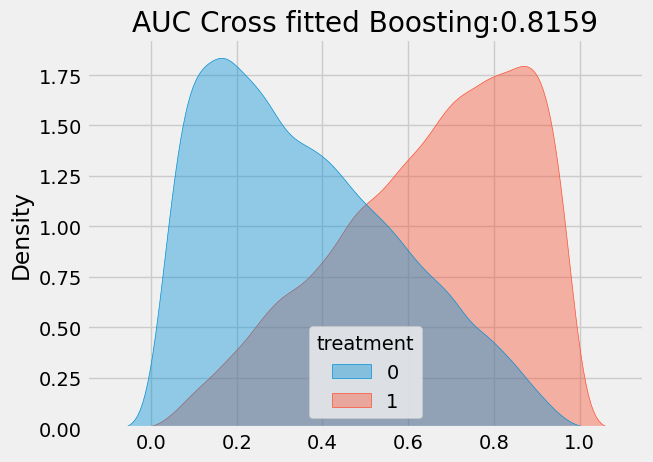

In [73]:
plot_results(ps_values, treatment["treatment"], name="Cross fitted Boosting")

### Réajustement DoWhy avec les données

Il faut réajuster le modèle causal DoWhy à partir des données pour bénéficier de l'estimateur

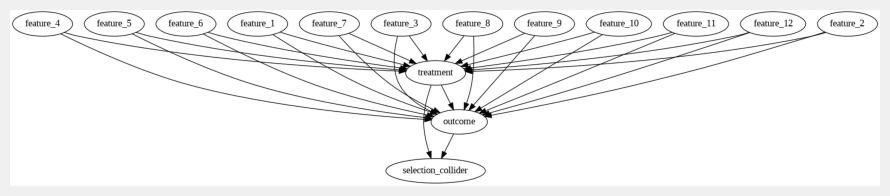

In [94]:
# Define a CausalModel object in DoWhy, indicate treatment & outcome
model= CausalModel(data=df_train, # data columns
        graph=causal_graph, # DAG
        treatment='treatment', # cause of interest, X
        outcome='outcome') # outcome, Y
model.view_model(size=(10,30))

In [95]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[outcome|feature_3,feature_8,feature_11,feature_5,feature_6,feat ↪
d[treatment]                                                                   ↪

↪                                                                      
↪ ure_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2])
↪                                                                      
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→outcome then P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2,U) = P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Etape 3.2 Base model

In [96]:
causal_estimate_reg  = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",
                                 test_significance=True,
                                 target_units="ate")

print(causal_estimate_reg )

print(f"ATE réel : {df_train['ite_prob'].mean()}")

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[outcome|feature_3,feature_8,feature_11,feature_5,feature_6,feat ↪
d[treatment]                                                                   ↪

↪                                                                      
↪ ure_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2])
↪                                                                      
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→outcome then P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2,U) = P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2)

## Realized e

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


#### EconML

In [97]:
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier

ldml_estimate = model.estimate_effect(identified_estimand,
                                    method_name="backdoor.econml.dml.dml.LinearDML",
                                    method_params={
                                        'init_params': {'model_y':RandomForestClassifier(),
                                                        'model_t':RandomForestClassifier(),
                                                        'discrete_treatment':True,
                                                        'discrete_outcome':True
                                                        },
                                        'fit_params': {
                                        }
                                     })
print(ldml_estimate)

print(f"ATE réel : {df_train['ite_prob'].mean()}")

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[outcome|feature_3,feature_8,feature_11,feature_5,feature_6,feat ↪
d[treatment]                                                                   ↪

↪                                                                      
↪ ure_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2])
↪                                                                      
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→outcome then P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2,U) = P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2)

## Realized e

In [98]:
ldml_estimate.cate_estimates

array([[[0.06898355]]])

#### DoubleML

Analyse de l'effet de la taille du groupe d'ajustement

In [99]:
from doubleml import DoubleMLData, DoubleMLIRM

In [100]:
control_set = [f"feature_{k}" for k in range(1,13)]
control_set

['feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12']

In [102]:
control_set_collider = control_set + ["selection_collider"]
control_set_collider

['feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'selection_collider']

In [103]:
dml_data = DoubleMLData(df_train,
                        y_col='outcome',
                        d_cols='treatment',
                        x_cols=control_set
                       )
print(dml_data)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: outcome
Treatment variable(s): ['treatment']
Covariates: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12']
Instrument variable(s): None
No. Observations: 35000

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 38094 to 15795
Columns: 19 entries, feature_1 to selection_collider
dtypes: float64(13), int64(5), object(1)
memory usage: 6.3+ MB



In [104]:
dml_irm_tree = DoubleMLIRM(dml_data,
                            ml_g = CatBoostClassifier(verbose=False),
                            ml_m = CatBoostClassifier(verbose=False),
                            trimming_threshold = 0.025,
                            n_folds = 3,
                            n_rep = 1,
                            score='ATE'
                          )

print(dml_irm_tree.fit(store_predictions=True))

================== DoubleMLIRM Object ==================

------------------ Data summary      ------------------
Outcome variable: outcome
Treatment variable(s): ['treatment']
Covariates: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12']
Instrument variable(s): None
No. Observations: 35000

------------------ Score & algorithm ------------------
Score function: ATE

------------------ Machine learner   ------------------
Learner ml_g: <catboost.core.CatBoostClassifier object at 0x7da41942bc90>
Learner ml_m: <catboost.core.CatBoostClassifier object at 0x7da419429bd0>
Out-of-sample Performance:
Classification:
Learner ml_g0 Log Loss: [[0.55857227]]
Learner ml_g1 Log Loss: [[0.51476621]]
Learner ml_m Log Loss: [[0.58569536]]

------------------ Resampling        ------------------
No. folds: 3
No. repeated sample splits: 1

------------------ Fit summary       ------------------


### Impact du collider

In [105]:
dml_data_collider = DoubleMLData(df_train,
                        y_col='outcome',
                        d_cols='treatment',
                        x_cols=control_set_collider
                       )
print(dml_data_collider)

================== DoubleMLData Object ==================

------------------ Data summary      ------------------
Outcome variable: outcome
Treatment variable(s): ['treatment']
Covariates: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'selection_collider']
Instrument variable(s): None
No. Observations: 35000

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 38094 to 15795
Columns: 19 entries, feature_1 to selection_collider
dtypes: float64(13), int64(5), object(1)
memory usage: 6.3+ MB



In [106]:
dml_irm_tree_collider = DoubleMLIRM(dml_data_collider,
                            ml_g = CatBoostClassifier(verbose=False),
                            ml_m = CatBoostClassifier(verbose=False),
                            trimming_threshold = 0.025,
                            n_folds = 3,
                            n_rep = 1,
                            score='ATE'
                          )

print(dml_irm_tree_collider.fit(store_predictions=True))

================== DoubleMLIRM Object ==================

------------------ Data summary      ------------------
Outcome variable: outcome
Treatment variable(s): ['treatment']
Covariates: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'selection_collider']
Instrument variable(s): None
No. Observations: 35000

------------------ Score & algorithm ------------------
Score function: ATE

------------------ Machine learner   ------------------
Learner ml_g: <catboost.core.CatBoostClassifier object at 0x7da31e565750>
Learner ml_m: <catboost.core.CatBoostClassifier object at 0x7da32b28c5d0>
Out-of-sample Performance:
Classification:
Learner ml_g0 Log Loss: [[0.5142381]]
Learner ml_g1 Log Loss: [[0.47950261]]
Learner ml_m Log Loss: [[0.55156173]]

------------------ Resampling        ------------------
No. folds: 3
No. repeated sample splits: 1

------------------ Fit summary     

Est-ce que ce résultat était prévu ?

### CausalML

CausalMl est un package édité par Uber

In [107]:
from causalml.inference.meta import BaseXClassifier, BaseRClassifier, BaseSClassifier, BaseTClassifier

In [108]:
T_estimate = model.estimate_effect(identified_estimand,
                                    method_name="backdoor.causalml.inference.meta.BaseTClassifier",
                                    method_params={
                                        'init_params': {'learner':CatBoostClassifier(verbose=False),
                                                        },
                                        'fit_params': {
                                        }
                                     })
print(T_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                         ↪
────────────(E[outcome|feature_3,feature_8,feature_11,feature_5,feature_6,feat ↪
d[treatment]                                                                   ↪

↪                                                                      
↪ ure_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2])
↪                                                                      
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→outcome then P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2,U) = P(outcome|treatment,feature_3,feature_8,feature_11,feature_5,feature_6,feature_9,feature_12,feature_1,feature_10,feature_4,feature_7,feature_2)

## Realized e

In [109]:
# The list of confounders is stored in the 'backdoor_variables' attribute
extracted_features = identified_estimand.backdoor_variables

print(extracted_features)

{'backdoor1': ['feature_3', 'feature_8', 'feature_11', 'feature_5', 'feature_6', 'feature_9', 'feature_12', 'feature_1', 'feature_10', 'feature_4', 'feature_7', 'feature_2'], 'backdoor2': ['feature_3', 'feature_8', 'feature_11', 'feature_5', 'feature_6', 'feature_9', 'feature_12', 'feature_1', 'feature_10', 'feature_4', 'feature_7', 'feature_2'], 'backdoor': ['feature_3', 'feature_8', 'feature_11', 'feature_5', 'feature_6', 'feature_9', 'feature_12', 'feature_1', 'feature_10', 'feature_4', 'feature_7', 'feature_2']}


In [110]:
control_set = extracted_features['backdoor']
control_set

['feature_3',
 'feature_8',
 'feature_11',
 'feature_5',
 'feature_6',
 'feature_9',
 'feature_12',
 'feature_1',
 'feature_10',
 'feature_4',
 'feature_7',
 'feature_2']

In [111]:
T_estimate.estimator.estimator.estimate_ate(X=df_train[control_set], treatment=df_train['treatment'], y=df_train['outcome'])

(array([0.07355512]), array([0.06538117]), array([0.08172908]))

In [112]:
print(f"ATE réel : {df_train['ite_prob'].mean()}")

ATE réel : 0.06945584741542764


## Etape 4 : réfuter

source docuentation [DoWhy](https://www.pywhy.org/dowhy/v0.9/example_notebooks/dowhy-conditional-treatment-effects.html)

Adding a random common cause variable

In [113]:
res_random=model.refute_estimate(identified_estimand, T_estimate, method_name="random_common_cause")
print(res_random)

KeyboardInterrupt: 

Adding an unobserved common cause variable

In [ ]:
res_unobserved=model.refute_estimate(identified_estimand, T_estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

Replacing treatment with a random (placebo) variable

In [ ]:
res_placebo=model.refute_estimate(identified_estimand, T_estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute",
        num_simulations=10 # at least 100 is good, setting to 10 for speed
        )
print(res_placebo)

Removing a random subset of the data

In [ ]:
res_subset=model.refute_estimate(identified_estimand, T_estimate,
        method_name="data_subset_refuter", subset_fraction=0.8,
        num_simulations=10)
print(res_subset)

# Application définition d'une politique de ciblage

In [114]:
# The list of confounders is stored in the 'backdoor_variables' attribute
extracted_features = identified_estimand.backdoor_variables

print(extracted_features)

{'backdoor1': ['feature_3', 'feature_8', 'feature_11', 'feature_5', 'feature_6', 'feature_9', 'feature_12', 'feature_1', 'feature_10', 'feature_4', 'feature_7', 'feature_2'], 'backdoor2': ['feature_3', 'feature_8', 'feature_11', 'feature_5', 'feature_6', 'feature_9', 'feature_12', 'feature_1', 'feature_10', 'feature_4', 'feature_7', 'feature_2'], 'backdoor': ['feature_3', 'feature_8', 'feature_11', 'feature_5', 'feature_6', 'feature_9', 'feature_12', 'feature_1', 'feature_10', 'feature_4', 'feature_7', 'feature_2']}


In [115]:
backdoor_set = extracted_features['backdoor']
backdoor_set
X_test_np = df_test[backdoor_set].to_numpy()
predictions_array = T_estimate.estimator.estimator.predict(X_test_np)
predicted_cate_T = predictions_array[:, -1]
predicted_cate_T

array([ 0.1967859 , -0.27431383,  0.41783695, ..., -0.302128  ,
       -0.06147685, -0.14451425])

In [116]:
# --- Step 5: Evaluate the Uplift Model ---

eval_df = pd.DataFrame({
    'y_true': df_test['outcome'],
    'treatment': df_test['treatment'],
    'ite_true': df_test['ite_prob'],
    'réel': df_test['ite_prob'],
    'T_cate': predicted_cate_T
})

In [118]:
from causalml.metrics import auuc_score

In [119]:
auuc = auuc_score(eval_df, outcome_col='y_true', treatment_col='treatment',
                  score_col='T_cate', ite_col='ite_true')
print(f"\nFinal AUUC Score: {auuc['T_cate']:.4f}")


Final AUUC Score: 1.1234


In [124]:
from causalml.metrics import plot_gain, plot_qini

In [121]:
eval_df

y_true  treatment  ite_true      réel    T_cate
33553       1          0  0.142659  0.142659  0.196786
9427        1          1 -0.300779 -0.300779 -0.274314
199         0          0  0.317920  0.317920  0.417837
12447       1          0  0.064765  0.064765  0.073343
39489       0          0  0.481632  0.481632  0.466509
...       ...        ...       ...       ...       ...
15168       1          1  0.247572  0.247572  0.374273
49241       0          0  0.412311  0.412311  0.474615
39317       1          1 -0.370103 -0.370103 -0.302128
42191       1          1 -0.132806 -0.132806 -0.061477
15109       1          1 -0.156849 -0.156849 -0.144514

[15000 rows x 5 columns]

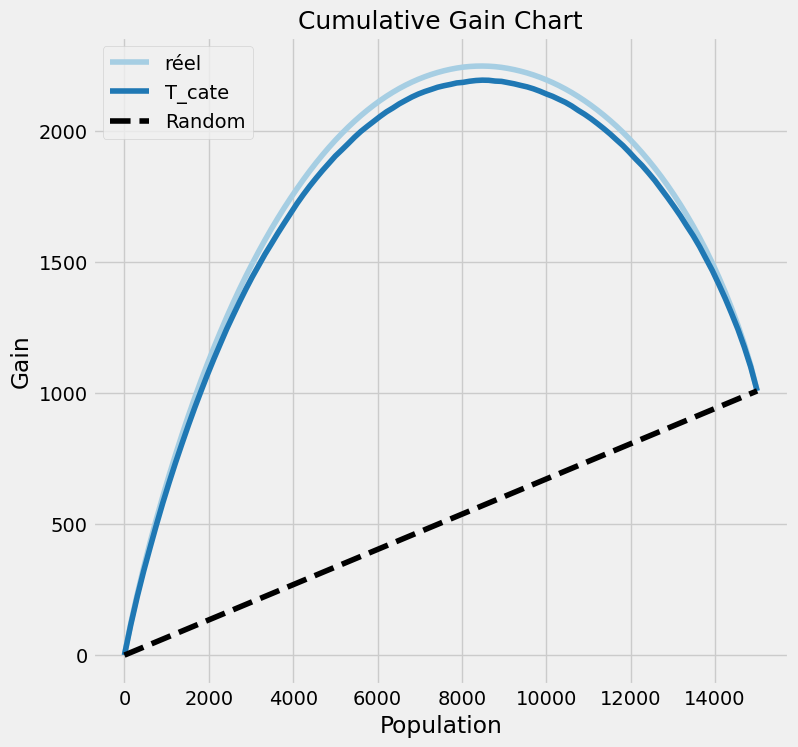

In [122]:
# Generate the Cumulative Gain Chart
plot_gain(eval_df,
          outcome_col='y_true',
          treatment_col='treatment',
          treatment_effect_col='ite_true')
plt.title("Cumulative Gain Chart", fontsize=18)
plt.show()

In [ ]:
T_estimate.estimator.estimator.estimate_ate(X=test_df[control_set], treatment=train_df['treatment'], y=train_df['outcome'])

In [127]:
eval_df.groupby(['treatment']).sum()

y_true     ite_true         réel       T_cate
treatment                                               
0            4736  1083.151207  1083.151207  1109.710387
1            5666   -74.505896   -74.505896   -34.190381

In [ ]:
3559 - 2244

1315

In [128]:
eval_df.sum()

y_true       10402.000000
treatment     7527.000000
ite_true      1008.645310
réel          1008.645310
T_cate        1075.520007
dtype: float64

In [129]:
# Sort the uplift_results DataFrame by 'uplift' in descending order
uplift_results = eval_df
uplift_results['user_id'] = eval_df.index
uplift_results_sorted_T = uplift_results.sort_values(by='T_cate', ascending=False).reset_index(drop=True)

# Print the customer list
print("Customer List Sorted by Uplift TLeraner:")
display(uplift_results_sorted_T[['user_id', 'T_cate']].head(10))

Customer List Sorted by Uplift TLeraner:


user_id    T_cate
0    18896  0.956198
1    13420  0.953853
2    23415  0.936517
3    15518  0.929171
4    48062  0.928017
5     7234  0.926213
6      241  0.917729
7    12483  0.913451
8    14229  0.910639
9    26645  0.908004

In [130]:
# Calculate Rank and Decile Label
uplift_results_sorted_T['rank'] = uplift_results_sorted_T['T_cate'].rank(method='first', ascending=False)
uplift_results_sorted_T['decile'] = pd.qcut(uplift_results_sorted_T['rank'], 10, labels=False)

decile_labels = [
    "top 10%", "top 10%-20%", "top 20%-30%", "top 30%-40%", "top 40%-50%",
    "top 50%-60%", "top 60%-70%", "top 70%-80%", "top 80%-90%", "bottom 10%"
]

column_order = ['user_id', 'T_cate', 'rank', 'decile', 'decile_label']
uplift_results_sorted_T['decile_label'] = uplift_results_sorted_T['decile'].map(lambda x: decile_labels[x])
display(uplift_results_sorted_T[column_order].head(10))


user_id    T_cate  rank  decile decile_label
0    18896  0.956198   1.0       0      top 10%
1    13420  0.953853   2.0       0      top 10%
2    23415  0.936517   3.0       0      top 10%
3    15518  0.929171   4.0       0      top 10%
4    48062  0.928017   5.0       0      top 10%
5     7234  0.926213   6.0       0      top 10%
6      241  0.917729   7.0       0      top 10%
7    12483  0.913451   8.0       0      top 10%
8    14229  0.910639   9.0       0      top 10%
9    26645  0.908004  10.0       0      top 10%

In [131]:
uplift_results_sorted_T[uplift_results_sorted_T['T_cate']<=0]

y_true  treatment  ite_true      réel    T_cate  user_id     rank  \
8560        1          0  0.042099  0.042099 -0.000014    39684   8561.0   
8561        1          1  0.118051  0.118051 -0.000024    24407   8562.0   
8562        1          1 -0.035842 -0.035842 -0.000058    28910   8563.0   
8563        1          1 -0.027944 -0.027944 -0.000079    46888   8564.0   
8564        1          0  0.061412  0.061412 -0.000084    15785   8565.0   
...       ...        ...       ...       ...       ...      ...      ...   
14995       1          0 -0.777115 -0.777115 -0.844250    25811  14996.0   
14996       0          1 -0.761962 -0.761962 -0.851251    42164  14997.0   
14997       0          1 -0.833916 -0.833916 -0.854294    48115  14998.0   
14998       0          1 -0.817985 -0.817985 -0.859557    20083  14999.0   
14999       0          1 -0.740674 -0.740674 -0.864555    11762  15000.0   

       decile decile_label  
8560        5  top 50%-60%  
8561        5  top 50%-60%  
8562        5  top 50%-60%  
8563        5  top 50%-60%  
8564        5  top 50%-60%  
...       ...          ...  
14995       9   bottom 10%  
14996       9   bottom 10%  
14997       9   bottom 10%  
14998       9   bottom 10%  
14999       9   bottom 10%  

[6440 rows x 9 columns]

In [136]:
fig = px.scatter(eval_df, x="T_cate", y="ite_true", marginal_x="histogram", marginal_y="histogram")
fig.show()